In [1]:
import os,sys

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random

Using TensorFlow backend.


### IMPORTANT

Change the `nrows` below to train on full dataset.

In [2]:
# df = pd.read_csv("../data/exT.csv",low_memory=False, nrows=2000)
df = pd.read_csv("../data/exT.csv", skiprows=lambda i: i>0 and random.random() > 0.3)

print(df.shape)
df.head()

(4767, 19103)


,Unnamed: 0,RAB4B,TIGAR,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,OR8D4
0,Liver.2,2.754200,0.731862,2.381832,0.001625,66.746912,11.377695,0.192728,14.376666,7.753051,...,0.009116,0.971517,0.103713,0.542160,0.133451,0.124427,34.824162,3.955412,0.089614,0.0
1,Sarcoma.1,19.799300,2.672300,4.944100,4.778500,3.003800,4.543300,0.009800,13.796900,12.044100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Uterus.1,7.189924,0.793070,13.450450,0.469526,190.374507,8.515609,0.839729,42.660399,2.959907,...,0.000000,1.473905,0.150216,5.266041,1.623094,0.016308,0.000000,16.305401,0.558120,0.0
3,Lymph.1,40.161800,8.542600,4.810400,9.922000,5.442600,10.571500,0.002500,8.471200,2.775800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Kidney.4,5.425666,2.782460,17.506464,0.030915,121.562001,15.644790,0.169730,6.080689,5.803236,...,6.855065,3.952264,0.685348,2.213312,18.943111,1.935447,0.018399,12.127573,1.885808,0.0


In [ ]:
df.info(verbose = False)

In [3]:
df = df.rename(columns={'Unnamed: 0':'labels'})
df.head()

,labels,RAB4B,TIGAR,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,OR8D4
0,Liver.2,2.754200,0.731862,2.381832,0.001625,66.746912,11.377695,0.192728,14.376666,7.753051,...,0.009116,0.971517,0.103713,0.542160,0.133451,0.124427,34.824162,3.955412,0.089614,0.0
1,Sarcoma.1,19.799300,2.672300,4.944100,4.778500,3.003800,4.543300,0.009800,13.796900,12.044100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Uterus.1,7.189924,0.793070,13.450450,0.469526,190.374507,8.515609,0.839729,42.660399,2.959907,...,0.000000,1.473905,0.150216,5.266041,1.623094,0.016308,0.000000,16.305401,0.558120,0.0
3,Lymph.1,40.161800,8.542600,4.810400,9.922000,5.442600,10.571500,0.002500,8.471200,2.775800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Kidney.4,5.425666,2.782460,17.506464,0.030915,121.562001,15.644790,0.169730,6.080689,5.803236,...,6.855065,3.952264,0.685348,2.213312,18.943111,1.935447,0.018399,12.127573,1.885808,0.0


In [ ]:
# df.describe() # not so helpful because of 19k features

In [ ]:
df.isna().sum().sum()/ len(df) * 100 # check for NaNs, If any..

In [4]:
df['Y'] = df['labels'].apply(lambda x: x.split(".")[0])
df['Y'].head()

0      Liver
1    Sarcoma
2     Uterus
3      Lymph
4     Kidney
Name: Y, dtype: object

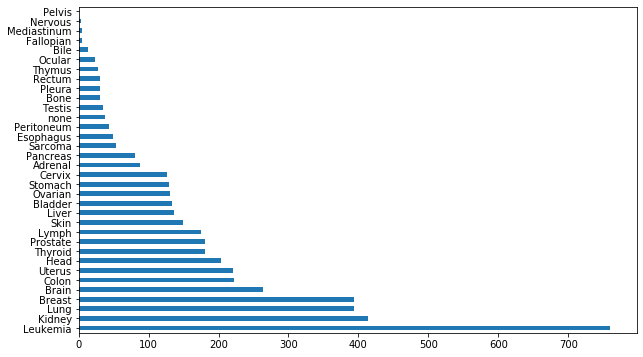

In [5]:
df['Y'].value_counts().plot(kind='barh', figsize = (10,6))

Looks like the dataset is extremely imbalanced. Might have to do do something for it. 

I tried to visualize these values as well.
Figure below shows the boxplots for two of these features.

In [ ]:
import seaborn as sns
sns.boxplot(df['TIGAR'], whis= 3)
plt.xlim(0, 250)

In [ ]:
import seaborn as sns
sns.boxplot(df['RAB4B'], whis= 3)
plt.xlim(0, 250)

There are some outliers, but not sure we need to remove them for classifier to improve its robustness or use just as it is since this is Gene's data. 
Also since we are more concerned on the determination of classification, I'd say we can get away with this since it performed satisfactorily.

### Label Encoding the categorical variable Y

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

df['Y'] = label_encoder.fit_transform(df['Y'])
df['Y'].head()

0    13
1    26
2    32
3    15
4    11
Name: Y, dtype: int64

In [8]:
print(len(label_encoder.classes_))
label_encoder.classes_

34


array(['Adrenal', 'Bile', 'Bladder', 'Bone', 'Brain', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'Fallopian', 'Head', 'Kidney', 'Leukemia',
       'Liver', 'Lung', 'Lymph', 'Mediastinum', 'Nervous', 'Ocular',
       'Ovarian', 'Pancreas', 'Pelvis', 'Peritoneum', 'Pleura',
       'Prostate', 'Rectum', 'Sarcoma', 'Skin', 'Stomach', 'Testis',
       'Thymus', 'Thyroid', 'Uterus', 'none'], dtype=object)

In [7]:
labels = df.pop("labels")
Y = df.pop("Y")

In [ ]:
Y.head()

### Converting Y into 1-hot

In [8]:
Y = keras.utils.to_categorical(Y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
df.head() # X

### Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3813, 19102), (954, 19102), (3813, 34), (954, 34))

Faced MemoryError while standardizing this so doing these steps  
- reset df variable from memory
- save backup for splitted data

In [ ]:
# Variables in memory that's hogging the memories greater than 1MB.
local_vars = list(locals().items())
for var, obj in local_vars:
    size = sys.getsizeof(obj)/1000
    if size > 1024:
        print(var, size/1024,"MB")

# df 2439707.544 KB # Evenif the memory was just 2.4GB, it was giving issues occassionally.
# labels 1075.379 KB
# X_train 1951868.152 KB
# X_test 487967.056 KB
# y_train 1737.104 KB


In [ ]:
# %reset_selective -f "^df$"  # Releasing memory of df variable

### Feature Scaling 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
X_test.shape

(954, 19102)

In [ ]:
filename = "../data/load/5k_lime/7scaled_splitted_data_lime.npz"
# filename = "../data/splitted_data_X_train.npz"

In [ ]:
np.savez_compressed(filename, X_train=X_train, X_test=X_test, 
                    y_train=y_train, y_test=y_test,
                    feature_names=df.columns,
                    class_names=label_encoder.classes_
                   )
print(f"{filename} data saved..")

Load the splitted variables for next step.
Just Run this below to load them and start experimentation later.

In [ ]:
# a = np.load(filename)

In [ ]:
# X_train, X_test, y_train, y_test = a["X_train"], a["X_test"], a["y_train"], a["y_test"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Model Definition

In [11]:
model = Sequential()
model.add(Dense(1024, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['categorical_crossentropy','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              19561472  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 34)                4386      
Total params: 20,156,322
Trainable params: 20,156,322
Non-trainable params: 0
_________________________________________________________________


## Training

In [12]:
checkpoint_path = "out/lime/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [13]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    verbose=1, 
                    epochs=5, 
                    shuffle=True,
                    callbacks = [cp_callback])

Train on 3813 samples, validate on 954 samples
Epoch 1/5
3813/3813 [==============================] - 4s 1ms/step - loss: 1.6450 - categorical_crossentropy: 1.6450 - accuracy: 0.7600 - val_loss: 0.7161 - val_categorical_crossentropy: 0.7161 - val_accuracy: 0.8679

Epoch 00001: saving model to out/lime/cp.ckpt
Epoch 2/5
3813/3813 [==============================] - 4s 961us/step - loss: 0.4124 - categorical_crossentropy: 0.4124 - accuracy: 0.9043 - val_loss: 0.6138 - val_categorical_crossentropy: 0.6138 - val_accuracy: 0.8931

Epoch 00002: saving model to out/lime/cp.ckpt
Epoch 3/5
3813/3813 [==============================] - 4s 970us/step - loss: 0.3367 - categorical_crossentropy: 0.3367 - accuracy: 0.9284 - val_loss: 0.7464 - val_categorical_crossentropy: 0.7464 - val_accuracy: 0.8910

Epoch 00003: saving model to out/lime/cp.ckpt
Epoch 4/5
3813/3813 [==============================] - 4s 977us/step - loss: 0.2708 - categorical_crossentropy: 0.2708 - accuracy: 0.9394 - val_loss: 0.6898 

## Evaluating with Validation set

In [ ]:
predicted_valid_labels = np.argmax(model.predict(X_test), axis=1)
valid_labels = np.argmax(y_test, axis=1)

test_range = range(10)
print("Predicted labels: ", predicted_valid_labels[test_range])
print("True labels: ", valid_labels[test_range])

real = label_encoder.inverse_transform(valid_labels[test_range])
predicts = label_encoder.inverse_transform(predicted_valid_labels[test_range])
print("real:preds\n",{real[i]:predicts[i] for i in test_range})

In [ ]:
# Visualization of Confusion Matrix
import seaborn as sns

cm = metrics.confusion_matrix(valid_labels, predicted_valid_labels)
# print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20,20))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", linewidths=.5, square = True, cmap = 'summer')
plt.xlabel('Predicted Values', size=20)
plt.ylabel('Actual Values', size=20)

ticks = np.arange(len(set(valid_labels)))
tick_marks = ['Adrenal', 'Bile', 'Bladder', 'Bone', 'Brain', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'Fallopian', 'Head', 'Kidney', 'Leukemia',
       'Liver', 'Lung', 'Lymph', 'Mediastinum', 'Nervous', 'Ocular',
       'Ovarian', 'Pancreas', 'Pelvis', 'Peritoneum', 'Pleura',
       'Prostate', 'Rectum', 'Sarcoma', 'Skin', 'Stomach', 'Testis',
       'Thymus', 'Thyroid', 'Uterus', 'none']

plt.xticks(ticks+0.5 ,tick_marks, rotation=90, size=12) #add 0.5 to ticks to position it at center
plt.yticks(ticks+0.5 ,tick_marks, rotation=0, size=12)
# all_sample_title = 'Accuracy Score: {:.4f}'.format(93) # hardcoded this from training logs for now :D
# plt.title(all_sample_title, size = 30)
plt.show()

## Lime Explainer

In [14]:
import lime
import lime.lime_tabular

we compute statistics on each feature (column). If the feature is numerical, we compute the mean and std, and discretize it into quartiles

In [25]:
# %%prun
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=df.columns, 
                                                   class_names=label_encoder.classes_)

For this multi-class classification problem, we set the top_labels parameter, so that we only explain the top class with the highest level of probability.

In [69]:
# %%prun
i = np.random.randint(0, X_test.shape[0])
print(i)
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10, top_labels=5)

600


In [70]:
# exp.show_in_notebook(show_table=True, show_all=False)

feature1 ≤ X means when this feature’s value satisfy this criteria it support class 0.   
Float point number on the horizontal bars represent the relative importance of these features.

In [71]:
exp.show_in_notebook(show_table=True, show_all=True)

In [72]:
#for easier analysis and further processing
for i in exp.available_labels():
    print(label_encoder.classes_[i])
#     display(pd.DataFrame(exp.as_list(label=i)))
    display(exp.as_list(label=i))

Colon


[('-0.86 < CCDC14 <= -0.19', 0.002002398700307514),
 ('-0.92 < CXXC5 <= -0.22', 0.001968356255067798),
 ('MYT1L > -0.18', 0.001735236406381209),
 ('-0.31 < LRRTM2 <= -0.10', 0.001730010558403681),
 ('RRP12 <= -0.63', 0.0016546674455529516),
 ('FAM120B <= -0.38', 0.0016541047813024388),
 ('COA3 > 0.47', 0.0015808668271313977),
 ('LMTK3 <= -0.58', 0.0015788078194950796),
 ('-0.59 < MORC4 <= -0.23', 0.00156260654107608),
 ('-0.36 < PRDM16 <= -0.15', 0.0015271003366444033)]

Cervix


[('KRT84 > -0.03', -0.0003044274966919796),
 ('-0.31 < LRRTM2 <= -0.10', 0.0002701336707337021),
 ('PIK3AP1 > 0.06', -0.00026965343979395106),
 ('NCOA7 > 0.29', 0.00026034142740435364),
 ('-0.91 < FMNL3 <= -0.24', 0.0002316928732110195),
 ('-1.06 < CCDC137 <= -0.11', 0.0002135613389093307),
 ('-0.79 < MAP3K12 <= -0.30', 0.00020641642792000757),
 ('-0.46 < TFAP2C <= 0.13', -0.0002004355392986959),
 ('-0.36 < C4A <= -0.08', 0.00018328795005977352),
 ('-1.11 < RECQL5 <= -0.03', -0.00018250694488175932)]

Lung


[('FERMT1 > -0.07', -0.014827724633606026),
 ('-0.71 < SIPA1 <= -0.21', 0.01464596389120996),
 ('-0.89 < TNKS <= -0.12', 0.014462806826448205),
 ('-0.45 < FOXM1 <= 0.34', 0.014245620074035643),
 ('ESYT3 > -0.07', 0.012250557208390016),
 ('-0.60 < TOP2A <= -0.38', -0.010312458342908934),
 ('-0.27 < A2M <= 0.05', -0.009874265575131089),
 ('-0.35 < C19orf57 <= 0.08', 0.008858409691093569),
 ('HOXB7 > 0.33', -0.00863525575790501),
 ('POPDC2 > -0.06', -0.008533471030817625)]

Pancreas


[('-0.35 < PLSCR2 <= -0.25', -0.0020448555515334976),
 ('EBP > 0.18', 0.0018476567540817873),
 ('-0.19 < TPI1 <= 0.53', 0.00181214245934251),
 ('IDH1 > 0.24', 0.001585550358067859),
 ('-0.90 < ZNF674 <= -0.02', 0.0014107368067922967),
 ('C4orf33 > 0.28', 0.0013283581452929074),
 ('-0.34 < MBOAT2 <= 0.27', -0.0012505789089035557),
 ('SNCA > -0.13', -0.0012367235936475345),
 ('SBDS > 0.61', 0.0010238587183174525),
 ('FAM71C <= -0.04', -0.001022123716560375)]

Rectum


[('-0.28 < AL023806.1 <= -0.01', 0.0002316717170380695),
 ('SSX2 <= -0.36', -0.0002208552489223381),
 ('-0.19 < DPEP1 <= -0.19', 0.00021739263432638597),
 ('-0.24 < GYPA <= -0.13', 0.0002094706658770025),
 ('UGT2B28 <= -0.05', 0.0002055544277484001),
 ('-0.63 < EDA2R <= -0.36', -0.00020306479238840484),
 ('-0.36 < SAMD12 <= 0.30', -0.00020293019108174812),
 ('OR5D14 <= -0.27', -0.00019474786076787071),
 ('HSD17B10 > 0.48', -0.0001755155264575161),
 ('CXCL5 > -0.14', 0.0001553617424120236)]